Problem Statement:

For a given noisy or inconsistent dataset, implement data cleaning and preprocessing using different data mining techniques.

Dataset Used:
Titanic Survivor Datasets

Kaggle Link:
https://www.kaggle.com/vermaamitesh/titanic-survivor-datasets


**Import Libraries**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [104]:
url = 'https://raw.githubusercontent.com/prajaktajoshi2390/data-cleaning-and-preprocessing/main/titanic-survivor-datasets.csv'
df1 = pd.read_csv(url)

In [105]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**--> Handle NA Values**

In [108]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
df1.drop(columns='Cabin', inplace=True)
#df1.Cabin = df1.Cabin.fillna("unknown")

In [110]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**--> Apply Univariate Imputation**

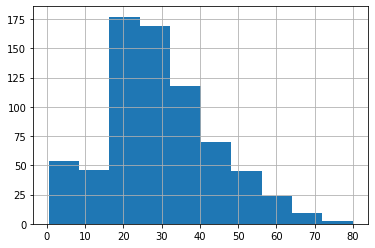

In [111]:
df1['Age'].hist();

In [112]:
age_mean = df1['Age'].mean()
df1['Age'].replace(np.nan, age_mean, inplace=True)
fare_mean = df1['Fare'].mean()
df1['Fare'].replace(np.nan, fare_mean, inplace=True)

In [113]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**--> Categorical Variable Substitution**

In [114]:
df1['Embarked'].replace(np.nan, 'S', inplace=True)

In [115]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**--> Drop unimportant columns**

In [116]:
columns_dropped = ['PassengerId','Ticket','Name']
df1.drop(columns=columns_dropped, inplace=True)

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [41]:
!pip install category_encoders

**--> Use category encoder with One Hot Encoding for sex and embarked attributes.**

In [118]:
import category_encoders as cat_encoder

columns_encoded = ['Sex', 'Embarked']
one_hot_enc = cat_encoder.OneHotEncoder(cols=columns_encoded)
df1 = one_hot_enc.fit_transform(df1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [119]:
df1.head()

,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,0,3,1,0,22.0,1,0,7.2500,1,0,0
1,1,1,0,1,38.0,1,0,71.2833,0,1,0
2,1,3,0,1,26.0,0,0,7.9250,1,0,0
3,1,1,0,1,35.0,1,0,53.1000,1,0,0
4,0,3,1,0,35.0,0,0,8.0500,1,0,0


In [120]:
df1.drop(columns=['Sex_2','Embarked_3'], inplace=True)

In [121]:
df1.head()

,Survived,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,1,0
3,1,1,0,35.0,1,0,53.1000,1,0
4,0,3,1,35.0,0,0,8.0500,1,0


**--> Feature Enginnering: Creation of new variable to replace multiple existing related variables**

In [122]:
df1['members_per_family'] = df1['SibSp'] + df1['Parch'] + 1
df1.drop(columns=['SibSp','Parch'], inplace=True)

In [123]:
df1.head()

,Survived,Pclass,Sex_1,Age,Fare,Embarked_1,Embarked_2,members_per_family
0,0,3,1,22.0,7.2500,1,0,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,1,0,1
3,1,1,0,35.0,53.1000,1,0,2
4,0,3,1,35.0,8.0500,1,0,1


In [124]:
target = df1['Survived']
metricList = ['Pclass', 'Sex_1', 'Age', 'Fare', 'Embarked_1', 'Embarked_2', 'members_per_family']
inputs = df1[metricList]

**--> Implement Scaling and Normalization**

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object 
scaler = MinMaxScaler()

# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

**Build the model**

In [126]:
# Import module for splitting data
from sklearn.model_selection import train_test_split

# split dataset into 75% training and 25% test          #x          #y                    #same sample of data
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.25, random_state=0)

**Test the model with different regression techniques**

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [128]:
regressors = []
regressors.append(('Linear Regression', LinearRegression()))
regressors.append(('KNN Regression', KNeighborsRegressor(n_neighbors=2, weights='uniform')))
regressors.append(('Random Forest Regression', RandomForestRegressor(n_estimators=500, random_state=102)))
regressors.append(('AdaBoost Regression', AdaBoostRegressor(n_estimators=50, random_state=None)))
regressors.append(('XGBoost Regression', XGBRegressor(verbosity=0, n_estimators=500)))

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target,  test_size=0.25, random_state=0)

In [129]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

results = []
predictions = []

for name, regressor in regressors:
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_train)
  r2 = metrics.r2_score(y_train, y_pred)
  mse = mean_squared_error(y_train, y_pred)
  mae = mean_absolute_error(y_train, y_pred)
  acc = (regressor.score(x_train, y_train)) * 100
  results.append([name, r2, mse, mae, acc])
  predictions.append([name, y_pred])

df_regressions = pd.DataFrame(results, columns=['Name', 'R2 Score', 'MSE', 'MAE', 'Accuracy'])
df_predictions = pd.DataFrame(predictions, columns = ['Name', 'Predictions'])

**Find out the model prediction accuracy**

In [130]:
df_regressions

,Name,R2 Score,MSE,MAE,Accuracy
0,Linear Regression,0.391824,0.144172,0.295163,39.182390
1,KNN Regression,0.747400,0.059880,0.116766,74.740026
2,Random Forest Regression,0.881746,0.028033,0.101039,88.174622
3,AdaBoost Regression,0.423835,0.136583,0.318412,42.383454
4,XGBoost Regression,0.802083,0.046917,0.143090,80.208256
